In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
import seaborn as sns

%matplotlib inline

In [10]:
def reverse(a):
    str = ""
    for i in a:
        str = i + str
    return str

In [11]:
a = 'IloveTraveling'

In [12]:
print("the original string is: ",end="")
print(a)

the original string is: IloveTraveling


In [13]:
print("The reversed string(using loops) is: ",end="")
print(reverse(a))

The reversed string(using loops) is: gnilevarTevolI


Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

In [14]:
#bayes theorem: P(A|B) = P(B|A)*P(A)) / P(B)
    # calculating prob of not A n_a = 1 - a 
    # calculating prob of b prob_b = b_given_a * a + b_given_not_a * n_a
    # calculating prob of a given b prob_a_giv_b =(b_given_a*a,)/prob_b return prob_a_giv_b

def bayes(a, b_given_a, b_given_not_a):
    post_prob = (b_given_a * a) / ((b_given_a * a) + b_given_not_a * (1 - a))
    return post_prob

print(bayes(0.9, 3.5, 7))

0.8181818181818182


Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

 - Stolen bases per game
 - Wins
 - Earned run average
 
b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

In [15]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
baseball_team = pd.read_csv(url)

In [16]:
baseball_team.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1


In [17]:
#baseball_team.info()

In [18]:
baseball_team_95 = baseball_team.loc[baseball_team["yearID"] >= 1995]
baseball_team_95.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,...,113.0,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,...,141.0,0.98,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL


In [19]:
baseball_team_95['SB_per_game'] = baseball_team_95['SB'] / baseball_team_95['G']

C:\Users\GaukharJavarova\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SB per game is based on an event per time period therefore following the Poisson distribution. 

(array([ 19.,  87., 127., 145., 102.,  74.,  43.,  18.,   4.,   5.]),
 array([0.19135802, 0.30416667, 0.41697531, 0.52978395, 0.64259259,
        0.75540123, 0.86820988, 0.98101852, 1.09382716, 1.2066358 ,
        1.31944444]),
 <a list of 10 Patch objects>)

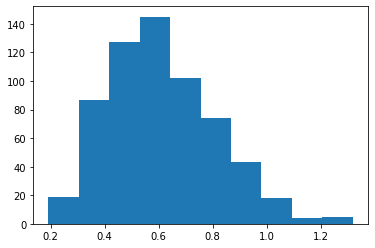

In [20]:
plt.hist(baseball_team_95['SB_per_game'])

#bases stolen
#baseball_team_95.SB.hist()
#plt.xlabel("Frequency")
#plt.ylabel("Bases Stolen")
#plt.title("Bases stolen by team per year since 1995")
#plt.show()




#wins
#baseball_team_95.W.hist()
#plt.xlabel("Wins")
#plt.ylabel("Wins by team per year since 1995")
#plt.title("Frequency")
#plt.show()

Wins can have two outcomes:  win or loss therefore following the Binomial distribution.

(array([  1.,  13.,  32., 120., 131., 118., 127.,  71.,   9.,   2.]),
 array([ 43. ,  50.3,  57.6,  64.9,  72.2,  79.5,  86.8,  94.1, 101.4,
        108.7, 116. ]),
 <a list of 10 Patch objects>)

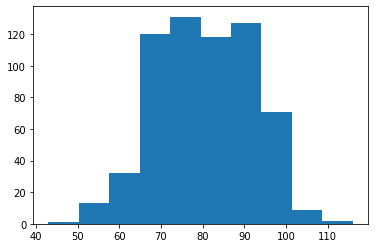

In [23]:
plt.hist(baseball_team_95['W']) 

#earnings
#baseball_team_95.ERA.hist()
#plt.xlabel("ERA")
#plt.ylabel("Frequency")
#plt.title("Earned Run Average (ERA) stolen by each team per year since 1995")
#plt.show()

ERA looks to follow the normal distribution. 

(array([ 16.,  56., 103., 156., 126., 100.,  47.,  16.,   3.,   1.]),
 array([2.94 , 3.284, 3.628, 3.972, 4.316, 4.66 , 5.004, 5.348, 5.692,
        6.036, 6.38 ]),
 <a list of 10 Patch objects>)

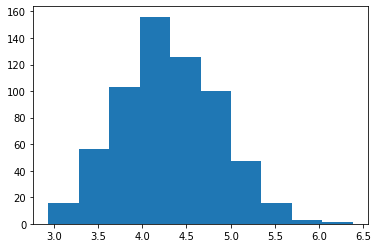

In [26]:
plt.hist(baseball_team_95['ERA']) 

In [27]:
baseball_team_95.corr()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,SB_per_game
yearID,1.000000,0.022269,0.367340,0.365277,0.060672,0.060867,-0.385195,0.195462,-0.223833,-0.050959,...,-0.232665,-0.368648,0.551743,-0.390934,-0.114953,0.574168,0.160323,-0.007747,-0.007964,-0.191151
Rank,0.022269,1.000000,0.016677,-0.006942,-0.863998,0.872770,-0.442457,-0.050315,-0.278540,-0.163972,...,0.346866,0.361046,-0.264860,0.260938,0.176721,-0.195845,-0.411316,-0.022917,0.095079,-0.059743
G,0.367340,0.016677,1.000000,0.968998,0.172994,0.151331,0.132309,0.849826,0.326821,0.297314,...,0.177871,0.064320,0.322117,0.001897,0.145008,0.238228,0.184114,-0.005340,-0.006137,-0.124072
Ghome,0.365277,-0.006942,0.968998,1.000000,0.185547,0.128816,0.136794,0.830716,0.331353,0.297788,...,0.175955,0.050160,0.316842,-0.010314,0.130831,0.238588,0.202183,-0.011593,-0.014100,-0.114627
W,0.060672,-0.863998,0.172994,0.185547,1.000000,-0.947283,0.519126,0.227550,0.375258,0.276727,...,-0.347610,-0.394061,0.388544,-0.315664,-0.175089,0.288436,0.499520,0.048555,-0.079277,0.044884
L,0.060867,0.872770,0.151331,0.128816,-0.947283,1.000000,-0.478956,0.047664,-0.270889,-0.181546,...,0.405778,0.415498,-0.283531,0.316276,0.222657,-0.209830,-0.441406,-0.050210,0.077916,-0.086026
R,-0.385195,-0.442457,0.132309,0.136794,0.519126,-0.478956,1.000000,0.437538,0.813432,0.583125,...,0.312145,0.173694,-0.189962,0.039045,0.154227,-0.076116,0.297219,0.300926,0.228502,0.058200
AB,0.195462,-0.050315,0.849826,0.830716,0.227550,0.047664,0.437538,1.000000,0.692250,0.522256,...,0.288660,0.148294,0.181285,0.006696,0.213688,0.177236,0.221599,0.116160,0.101674,-0.114381
H,-0.223833,-0.278540,0.326821,0.331353,0.375258,-0.270889,0.813432,0.692250,1.000000,0.648142,...,0.305757,0.187544,-0.127217,0.015735,0.211374,-0.002341,0.296032,0.298190,0.247813,0.021327
2B,-0.050959,-0.163972,0.297314,0.297788,0.276727,-0.181546,0.583125,0.522256,0.648142,1.000000,...,0.162781,0.096856,-0.058020,-0.009138,0.128505,0.086209,0.103523,0.237604,0.203106,-0.136193


In [28]:
y_ID_attend = baseball_team_95 ['yearID'].corr(baseball_team_95['attendance'])
print (y_ID_attend)

0.16032290063634194


In [29]:
avg = baseball_team['attendance'].mean()
avg

1344345.530482977

In [30]:
med = baseball_team['attendance'].median()
med

1140347.5

C:\Users\GaukharJavarova\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\GaukharJavarova\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


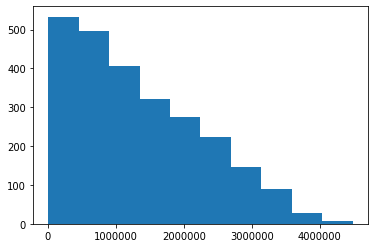

In [31]:
plt.hist(baseball_team['attendance'])
plt.show()

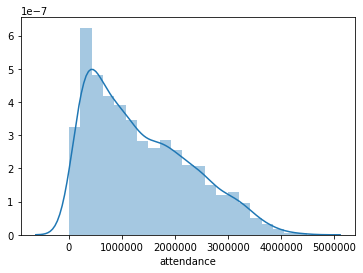

In [32]:
sns.distplot(baseball_team["attendance"])
plt.show()

In [33]:
choice = []
for i in range(1,1000):
    wins_baseball_team = baseball_team['W'].sample(n=100)
    wins_aver = wins_baseball_team.mean()
    choice.append(wins_aver)
    
    

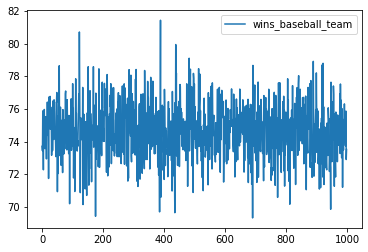

In [34]:
chart = pd.DataFrame({'wins_baseball_team' : choice})
chart.plot()

In [35]:
choices = []
for i in range(1,1000):
    ERA_baseball_team = baseball_team['ERA'].sample(n=100)
    ERA_aver = ERA_baseball_team.mean()
    choices.append(ERA_aver)

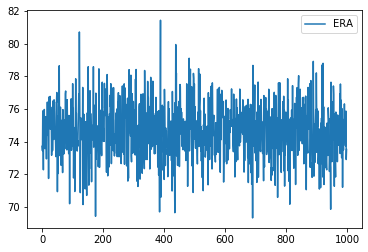

In [36]:
charts = pd.DataFrame({'ERA' : choice})
charts.plot()

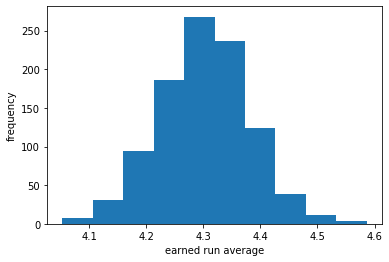

In [37]:
means = [mean(baseball_team_95['ERA'].sample(n=50)) for i in range(1000)]
plt.hist(means)
plt.xlabel('earned run average')
plt.ylabel('frequency')
plt.show()

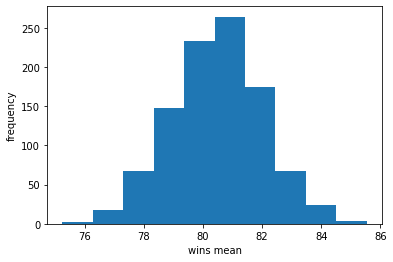

In [38]:
means = [mean(baseball_team_95['W'].sample(n=50)) for i in range(1000)]
plt.hist(means)
plt.xlabel("wins mean")
plt.ylabel('frequency')
plt.show()

These shows The Central Limit theorem which applies to almost all types of probability distributions. It states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

#the other way to do this follows bellow:

#W_means = []
#ERA_means = []
#for i in range(1000):
    #W_sample = baseball_team_95['W'].sample(n=100)
    #W_means.append(W_sample.mean())
    
    #ERA_sample = baseball_team_95['ERA'].sample(n=100)
    #ERA_means.append(ERA_sample.mean())
    
#print (W_means)

#sns.distplot(ERA_means)
#plt.show()
#sns.distplot(W_means)
#plt.show()

#quite symmetrical, following the normal distribution, bell shaped. 